**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые льготы
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - оценка благонадежности клиента (скоринговый балл, полученный из другого источника)
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1]:
import numpy as np
import pandas as pd

import pickle

import random

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from catboost import CatBoostClassifier

from sklearn.metrics import f1_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
import warnings
warnings.simplefilter('ignore')

### <center>Загрузка данных<a class="anchor" id="course_project"></a><center> 

In [3]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

In [4]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df_test =  pd.read_csv(TEST_DATASET_PATH)

### <center>Обзор датасета<a class="anchor" id="course_project"></a><center> 

#### Обзор тренировочного датасета

In [5]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.00,NaN,0.00,11.00,26.30,685960.00,1.00,nan,1.00,debt consolidation,Short Term,99999999.00,47386.00,7914.00,749.00,0
1,Own Home,1025487.00,10+ years,0.00,15.00,15.30,1181730.00,0.00,nan,0.00,debt consolidation,Long Term,264968.00,394972.00,18373.00,737.00,1
2,Home Mortgage,751412.00,8 years,0.00,11.00,35.00,1182434.00,0.00,nan,0.00,debt consolidation,Short Term,99999999.00,308389.00,13651.00,742.00,0
3,Own Home,805068.00,6 years,0.00,8.00,22.50,147400.00,1.00,nan,1.00,debt consolidation,Short Term,121396.00,95855.00,11338.00,694.00,0
4,Rent,776264.00,8 years,0.00,13.00,13.60,385836.00,1.00,nan,0.00,debt consolidation,Short Term,125840.00,93309.00,7180.00,719.00,0


In [6]:
df.shape

(7500, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

#### Обзор количественных признаков

In [8]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5943.00,7500.00,7500.00,7500.00,7500.00,7500.00,3419.00,7486.00,7500.00,7500.00,7500.00,5943.00,7500.00
mean,1366391.72,0.03,11.13,18.32,945153.73,0.17,34.69,0.12,11873177.45,289833.24,18314.45,1151.09,0.28
std,845339.20,0.27,4.91,7.04,16026216.67,0.50,21.69,0.35,31926122.97,317871.38,11926.76,1604.45,0.45
min,164597.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,11242.00,0.00,0.00,585.00,0.00
25%,844341.00,0.00,8.00,13.50,279229.50,0.00,16.00,0.00,180169.00,114256.50,10067.50,711.00,0.00
50%,1168386.00,0.00,10.00,17.00,478159.00,0.00,32.00,0.00,309573.00,209323.00,16076.50,731.00,0.00
75%,1640137.00,0.00,14.00,21.80,793501.50,0.00,50.00,0.00,519882.00,360406.25,23818.00,743.00,1.00
max,10149344.00,7.00,43.00,57.70,1304726170.00,7.00,118.00,4.00,99999999.00,6506797.00,136679.00,7510.00,1.00


#### Обзор целевой переменной

In [9]:
df['Credit Default'].value_counts(normalize=True)

0   0.72
1   0.28
Name: Credit Default, dtype: float64

#### Обзор номинативных/категориальных признаков

In [10]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

### <center>Обработка категориальных данных<a class="anchor" id="course_project"></a><center>

#### Количество лет на текущем месте работы

In [11]:
years_mapping = {
    '< 1 year': 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years': 10,
}

df['Years in current job'] = df['Years in current job'].map(years_mapping)
df_test['Years in current job'] = df_test['Years in current job'].map(years_mapping)

#### Домовладение

In [12]:
home_mapping = {
    'Home Mortgage': 1,
    'Rent': 0,
    'Own Home':2,
    'Have Mortgage':1    
}

df['Home Ownership'] = df['Home Ownership'].map(home_mapping)
df_test['Home Ownership'] = df_test['Home Ownership'].map(home_mapping)

#### Срок кредита

In [13]:
df.loc[df['Term'] == 'Short Term', 'Term'] = 0
df.loc[df['Term'] == 'Long Term', 'Term'] = 1
df['Term'] = df['Term'].astype(int)

df_test.loc[df_test['Term'] == 'Short Term', 'Term'] = 0
df_test.loc[df_test['Term'] == 'Long Term', 'Term'] = 1
df_test['Term'] = df_test['Term'].astype(int)

#### Цель кредита

Укрупним категории - объединим те, что совпадают по смыслу. После чего переведем в дамми.
Чтобы не прописывать 2 раза для трейна и теста, пишем функцию.

In [14]:
def change_purpose(df):
    df.loc[df['Purpose'] == 'take a trip', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'renewable energy', 'Purpose'] = 'business loan'
    df.loc[df['Purpose'] == 'small business', 'Purpose'] = 'business loan'
    df.loc[df['Purpose'] == 'buy house', 'Purpose'] = 'home improvements'
    df.loc[df['Purpose'] == 'moving', 'Purpose'] = 'home improvements'
    df.loc[df['Purpose'] == 'medical bills', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'wedding', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'educational expenses', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'vacation', 'Purpose'] = 'major purchase'
    df = pd.concat([df, pd.get_dummies(df["Purpose"])], axis=1)
    df.drop(['Purpose'], axis=1, inplace=True)
       
    return df

In [15]:
df = change_purpose(df);
df_test = change_purpose(df_test);

### <center>Обработка пропусков<a class="anchor" id="course_project"></a><center>

In [16]:
df.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
business loan                      0
buy a car                          0
debt consolidation                 0
home improvements                  0
major purchase                     0
other                              0
dtype: int64

#### Банкротства

In [17]:
df['Bankruptcies'].describe()

count   7486.00
mean       0.12
std        0.35
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        4.00
Name: Bankruptcies, dtype: float64

In [18]:
df['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

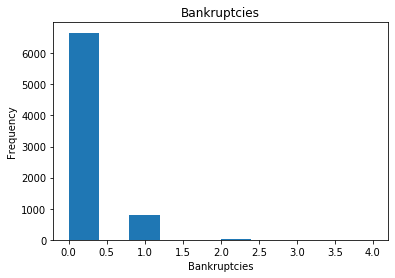

In [19]:
df['Bankruptcies'].plot.hist(title = 'Bankruptcies');
plt.xlabel('Bankruptcies');

Целесообразным представляется заменить пропущенные значения на 0

In [20]:
df.loc[df['Bankruptcies'].isnull(), 'Bankruptcies'] = 0
df_test.loc[df_test['Bankruptcies'].isnull(), 'Bankruptcies'] = 0

#### Количество лет на текущем месте работы

In [21]:
df['Years in current job'].describe()

count   7129.00
mean       5.88
std        3.62
min        0.00
25%        3.00
50%        6.00
75%       10.00
max       10.00
Name: Years in current job, dtype: float64

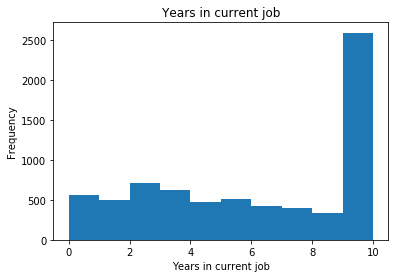

In [22]:
df['Years in current job'].plot.hist(title = 'Years in current job');
plt.xlabel('Years in current job');

In [23]:
df['Years in current job'].fillna(random.choice(df['Years in current job'].unique()[1:]), inplace=True)
df_test['Years in current job'].fillna(random.choice(df_test['Years in current job'].unique()[1:]), inplace=True)

#### Годовой доход

In [24]:
df['Annual Income'].describe()

count       5943.00
mean     1366391.72
std       845339.20
min       164597.00
25%       844341.00
50%      1168386.00
75%      1640137.00
max     10149344.00
Name: Annual Income, dtype: float64

Прежде чем заполнить пропуски в этом столбце, необходимо избавиться от выбросов и сохранить данные об отсутсвии данных о доходе в отдельную переменную

In [25]:
df['Without_Income'] = 0
df.loc[df['Annual Income'].isnull(), 'Without_Income'] = 1
df_test['Without_Income'] = 0
df_test.loc[df_test['Annual Income'].isnull(), 'Without_Income'] = 1

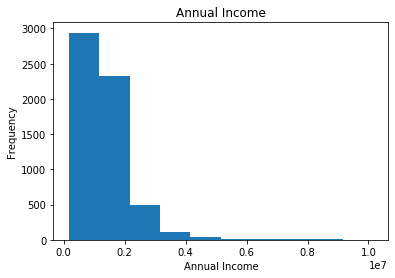

In [26]:
df['Annual Income'].plot.hist(title = 'Annual Income');
plt.xlabel('Annual Income');

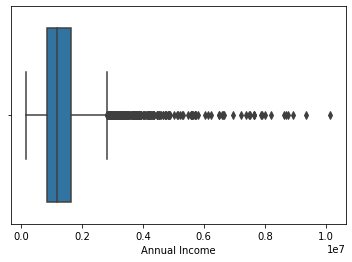

In [27]:
sns.boxplot(df['Annual Income'])

Т.к. неизвестно, данные какой страны, какого года представлены, исходя из минимальной зарплаты (13716 в месяц), средней (97 365,5 в месяц) и моды (97 365,5), предположим, что максимальные значения не превзойдут 3 млн. в год.
Предположим, что ошибка заключается в лишнем нуле. Для того, чтобы избавиться от выбросов, поделим их на 10.


In [28]:
df.loc[df['Annual Income']>=8000000, 'Annual Income'] = df.loc[df['Annual Income']>=8000000, 'Annual Income']//10
df_test.loc[df_test['Annual Income']>=8000000, 'Annual Income'] = df_test.loc[df_test['Annual Income']>=8000000, 'Annual Income']//10

Заполним недостающие данные медианой

In [29]:
df.loc[df['Annual Income'].isnull(), 'Annual Income'] = df['Annual Income'].median()
df_test.loc[df_test['Annual Income'].isnull(), 'Annual Income'] = df_test['Annual Income'].median()

#### Ооценка благонадежности клиента (скоринговый балл, полученный из другого источника)

In [30]:
df['Credit Score'].describe()

count   5943.00
mean    1151.09
std     1604.45
min      585.00
25%      711.00
50%      731.00
75%      743.00
max     7510.00
Name: Credit Score, dtype: float64

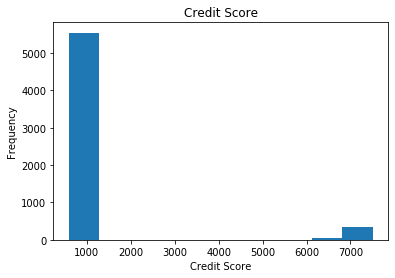

In [31]:
df['Credit Score'].plot.hist(title = 'Credit Score');
plt.xlabel('Credit Score');

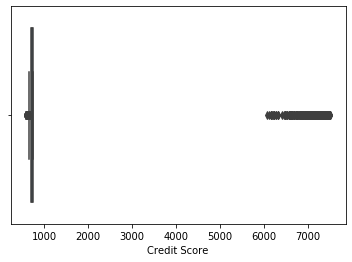

In [32]:
sns.boxplot(df['Credit Score'])

Т.к. по найденной в интернете информации кредитный скоринг считается в диапазоне до 1200 баллов, предположительно, ошибка в данных в том, что во всех ячейчах >1200 просто приписан дополнительный ноль. Поэтому убираем этот ноль и присваеваем пропущенным данным значение медианы. Предварительно добавляем новую колонку, которая принимает 1, если кредитный скоринг неизвестен и 0 - в противном случае.

In [33]:
df.loc[df['Credit Score']>1200, 'Credit Score'] = df.loc[df['Credit Score']>1200, 'Credit Score']//10
df_test.loc[df_test['Credit Score']>1200, 'Credit Score'] = df_test.loc[df_test['Credit Score']>1200, 'Credit Score']//10

df['Unscored'] = 0
df.loc[(df['Credit Score'].isnull()), 'Unscored'] = 1

df_test['Unscored'] = 0
df_test.loc[(df_test['Credit Score'].isnull()), 'Unscored'] = 1

df.loc[df['Credit Score'].isnull(), 'Credit Score'] = df['Credit Score'].median()
df_test.loc[df_test['Credit Score'].isnull(), 'Credit Score'] = df_test['Credit Score'].median()

#### Количество месяцев с последней просрочки платежа

In [34]:
df['Months since last delinquent'].describe()

count   3419.00
mean      34.69
std       21.69
min        0.00
25%       16.00
50%       32.00
75%       50.00
max      118.00
Name: Months since last delinquent, dtype: float64

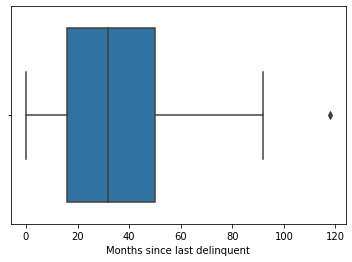

In [35]:
sns.boxplot(df['Months since last delinquent'])

В данном случае также сначала избавляемся то выброса (меняем выброс на значение медианы), а затем нулевые значения меняем на 0 (вероятно, задолженность отсутсвует)


In [36]:
df.loc[df['Months since last delinquent']>100, 'Months since last delinquent'] = df['Months since last delinquent'].median()
df_test.loc[df_test['Months since last delinquent']>100, 'Months since last delinquent'] = df_test['Months since last delinquent'].median()


df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0
df_test.loc[df_test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

### <center>Обработка выбросов<a class="anchor" id="course_project"></a><center> 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   int64  
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   float64
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Term                          7500 non-null   int32  
 11  Current Loan Amount           7500 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

In [38]:
df.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Credit Score,Credit Default,business loan,buy a car,debt consolidation,home improvements,major purchase,other,Without_Income,Unscored
count,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,...,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00
mean,0.66,1317590.29,5.64,0.03,11.13,18.32,945153.73,0.17,15.80,0.12,...,721.94,0.28,0.02,0.01,0.79,0.06,0.02,0.09,0.21,0.21
std,0.63,719815.46,3.68,0.27,4.91,7.04,16026216.67,0.50,22.62,0.35,...,25.15,0.45,0.14,0.11,0.41,0.24,0.15,0.28,0.41,0.41
min,0.00,164597.00,0.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,...,585.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,930335.00,2.00,0.00,8.00,13.50,279229.50,0.00,0.00,0.00,...,715.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1167569.00,6.00,0.00,10.00,17.00,478159.00,0.00,0.00,0.00,...,729.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1498401.75,10.00,0.00,14.00,21.80,793501.50,0.00,29.00,0.00,...,738.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,2.00,7999095.00,10.00,7.00,43.00,57.70,1304726170.00,7.00,92.00,4.00,...,751.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Налоговые льготы

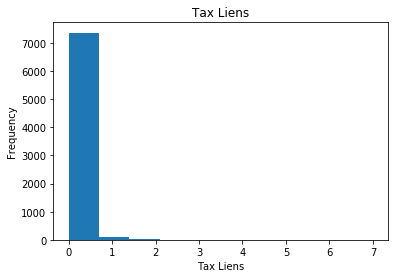

In [39]:
df['Tax Liens'].plot.hist(title = 'Tax Liens');
plt.xlabel('Tax Liens');

In [40]:
df.loc[df['Tax Liens']>1]=1
df_test.loc[df_test['Tax Liens']>1]=1

#### Количество открытых счетов

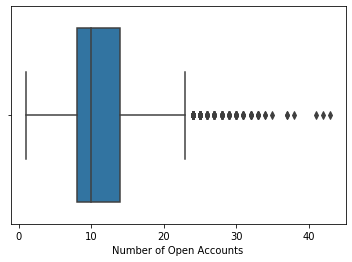

In [41]:
sns.boxplot(df['Number of Open Accounts'])

Маловероятно, что количество открытых счетов превышает 22, поэтому заменим выбросы на медиану

In [42]:
df.loc[df['Number of Open Accounts']>22, 'Number of Open Accounts'] = df['Number of Open Accounts'].median()
df_test.loc[df_test['Number of Open Accounts']>22, 'Number of Open Accounts'] = df_test['Number of Open Accounts'].median()

#### Количество лет кредитной истории

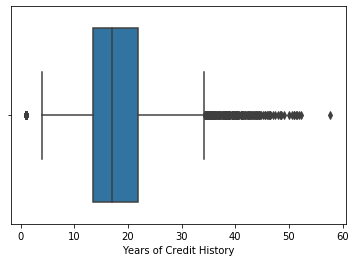

In [43]:
sns.boxplot(df['Years of Credit History'])

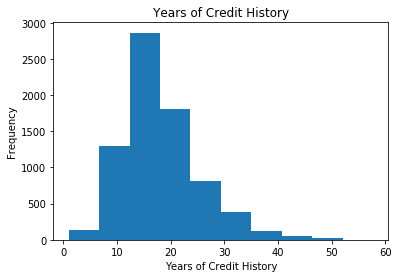

In [44]:
df['Years of Credit History'].plot.hist(title = 'Years of Credit History');
plt.xlabel('Years of Credit History');

По закону в России кредитная история хранится 10 лет (до 2015 года этот срок составлял 15 лет). Т.к. год, когда получены эти данные неизвестен, предположим, что во всех данные больше 25 лет указано не количество лет, а количество месяцев. При этом страна, в которой были получены данные также неизвестна. Распределение похоже на реальные данные, поэтому обработаем только правый хвост.
За гипотезу примем, что ошибка заключается в том, что указана лишняя цифра

In [45]:
df.loc[df['Years of Credit History']>25, 'Years of Credit History'] = df.loc[df['Years of Credit History']>25, 'Years of Credit History']//10
df_test.loc[df_test['Years of Credit History']>25, 'Years of Credit History'] = df_test.loc[df_test['Years of Credit History']>25, 'Years of Credit History']//10

#### Наибольший открытый кредит 

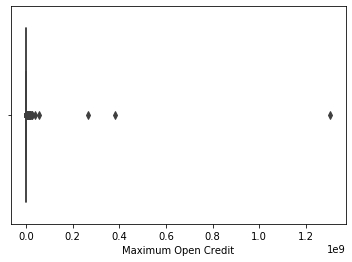

In [46]:
sns.boxplot(df['Maximum Open Credit'])


In [47]:
df['Maximum Open Credit'].describe()

count         7500.00
mean        941134.04
std       16026304.02
min              0.00
25%         275522.50
50%         475288.00
75%         792869.00
max     1304726170.00
Name: Maximum Open Credit, dtype: float64

Вероятно, самые большие выбросы произошли из-за склейки цифр\опечатки

In [48]:
df.loc[df['Maximum Open Credit']>8000000, 'Maximum Open Credit'] = df.loc[df['Maximum Open Credit']<8000000, 'Maximum Open Credit'].median()
df_test.loc[df_test['Maximum Open Credit']>8000000, 'Maximum Open Credit'] = df_test.loc[df_test['Maximum Open Credit']<8000000, 'Maximum Open Credit'].median()

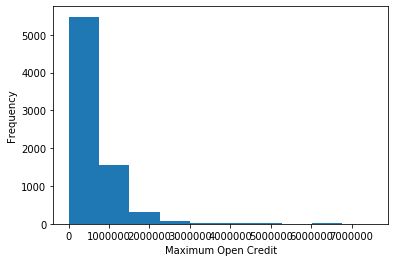

In [49]:
df['Maximum Open Credit'].plot.hist();
plt.xlabel('Maximum Open Credit');

#### Количество проблем с кредитом

In [50]:
df['Number of Credit Problems'].describe()

count   7500.00
mean       0.16
std        0.42
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        5.00
Name: Number of Credit Problems, dtype: float64

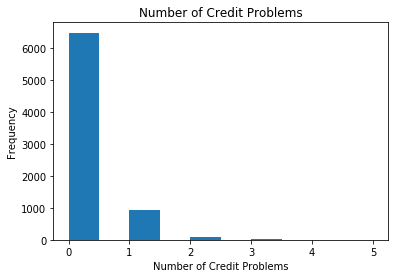

In [51]:
df['Number of Credit Problems'].plot.hist(title = 'Number of Credit Problems');
plt.xlabel('Number of Credit Problems');

Количество проблем с кредитом больше 5 составляет 0,74% наблюдений из всего датасета. При этом в данных наблюдениях достаточно высокий кредитный скоринг и целевая переменная = 0, поэтому предположим, что это выбросы и заменим на медиану

In [52]:
df.loc[df['Number of Credit Problems']>5, 'Number of Credit Problems'] = df['Number of Credit Problems'].median()
df_test.loc[df_test['Number of Credit Problems']>5, 'Number of Credit Problems'] = df_test['Number of Credit Problems'].median()

#### Текущая сумма кредита

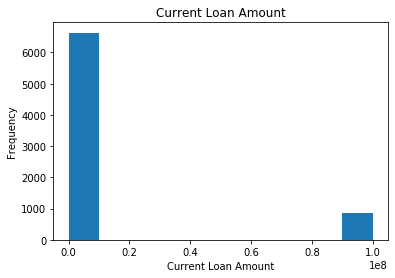

In [53]:
df['Current Loan Amount'].plot.hist(title = 'Current Loan Amount');
plt.xlabel('Current Loan Amount');

In [54]:
df['Current Loan Amount'].describe()

count       7500.00
mean    11830853.72
std     31879132.85
min            1.00
25%       178524.50
50%       306515.00
75%       516956.00
max     99999999.00
Name: Current Loan Amount, dtype: float64

В 870 наблюдениях текущая сумма кредита = 99999999, что очевидно, является ошибкой. Заменим эти данные на медиану. При этом для более точных данных возьмем часть датасета без выбросов, т.к. они сильно влияют на статистику по столбцу.

In [55]:
df.loc[df['Current Loan Amount']==99999999, 'Current Loan Amount'] = df.loc[df['Current Loan Amount']!=99999999, 'Current Loan Amount'].median()
df_test.loc[df_test['Current Loan Amount']==99999999, 'Current Loan Amount'] = df_test.loc[df_test['Current Loan Amount']!=99999999, 'Current Loan Amount'].median()

#### Текущий кредитный баланс

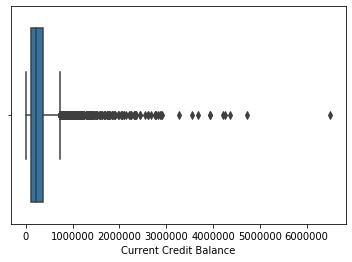

In [56]:
sns.boxplot(df['Current Credit Balance'])

Кредитный баланс не может превышат сумму самого большого кредита.


In [57]:
maximum = df['Maximum Open Credit'].max()
max_test = df_test['Maximum Open Credit'].max()

df.loc[df['Current Credit Balance']>maximum,  'Current Credit Balance'] = df.loc[df['Current Credit Balance']<maximum,  'Current Credit Balance'].median()
df_test.loc[df_test['Current Credit Balance']>max_test,  'Current Credit Balance'] = df_test.loc[df_test['Current Credit Balance']<max_test,  'Current Credit Balance'].median()


#### Ежемесячный долг

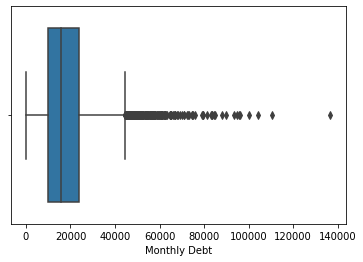

In [58]:
sns.boxplot(df['Monthly Debt'])

In [59]:
df.loc[df['Monthly Debt']>100000, 'Monthly Debt'] = df['Monthly Debt'].mean()
df_test.loc[df_test['Monthly Debt']>100000, 'Monthly Debt'] = df_test['Monthly Debt'].mean()

### <center>Построение новых признаков<a class="anchor" id="course_project"></a><center> 

На этапе обработки данных и удаления пропусков и выбросов были сгенерированы 2 признака:
- Unscored, которая принимает 1, если кредитный скоринг неизвестен и 0 - в противном случае;
- Without_Income = 1, если данные о годовойм доходе отсутсвуют и 0, если данные предоставлены


Добавим еще несколько признаков:

#### Ежемесячный остаток суммы после выплаты кредита

In [60]:
df['Remainder'] = df['Annual Income'] / 12 - df['Monthly Debt']
df_test['Remainder'] = df_test['Annual Income'] / 12 - df_test['Monthly Debt']

#### Переменная Problems, которая принимает 0, если не было банкротств и Количество проблем с кредитом = 0, в противном случае - 1

In [61]:
df['Problems'] = np.where((df['Bankruptcies'] == 0) & (df['Number of Credit Problems'] == 0), 0, 1)
df_test['Problems'] = np.where((df_test['Bankruptcies'] == 0) & (df_test['Number of Credit Problems'] == 0), 0, 1)

### <center>Анализ данных и проверка статистических гипотез<a class="anchor" id="course_project"></a><center> 

#### Выделение целевой переменной и групп признаков

In [62]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

### Анализ целевой переменной

#### Обзор распределения

In [63]:
df[TARGET_NAME].value_counts()

0    5360
1    2140
Name: Credit Default, dtype: int64

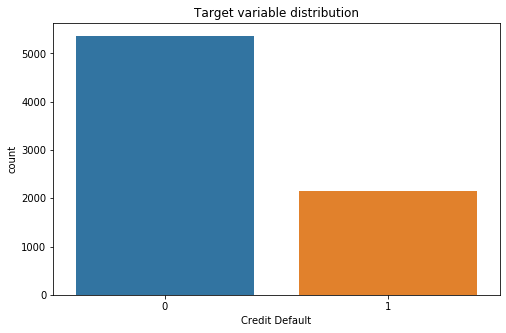

In [64]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

#### Корреляция с базовыми признаками

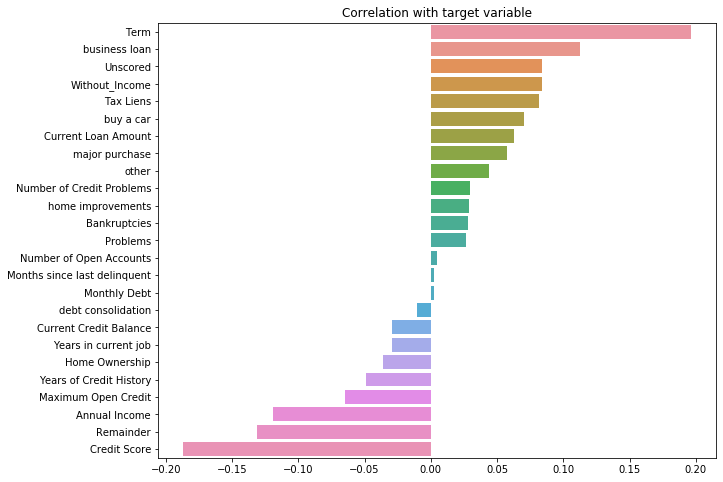

In [65]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака 'Term' в разрезе целевой переменной**

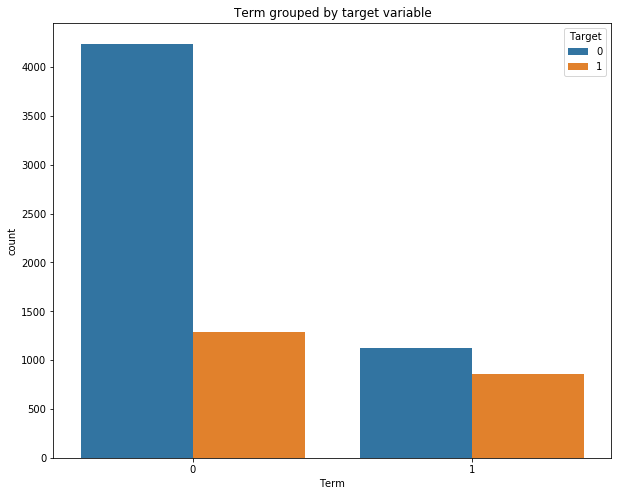

In [66]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Term", hue=TARGET_NAME, data=df)
plt.title('Term grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

По графику видно, что доля выплат краткосрочных кредитов выше, чем долгосрочных. Вероятность выплаты краткосрочного кредита - около 0,75, а долгосрочного примерно 0,6

#### Оценка признака "Bankruptcies" в разрезе целевой переменной

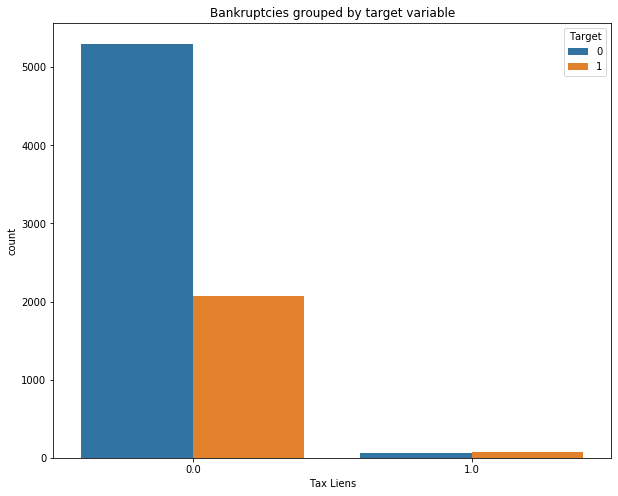

In [67]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Tax Liens", hue=TARGET_NAME, data=df)
plt.title('Bankruptcies grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

График показывает, что выроятность невыплаты кредита, если были банкротства - выше, чем вероятность выплаты.

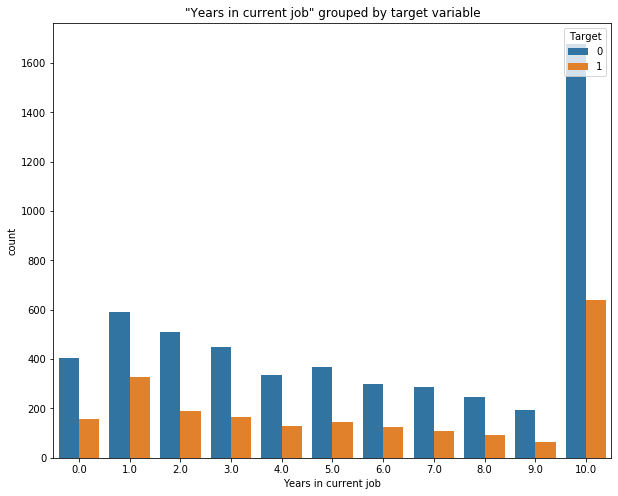

In [68]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Years in current job", hue=TARGET_NAME, data=df)
plt.title('\"Years in current job\" grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

### Анализ признакового пространства

#### Матрица корреляций

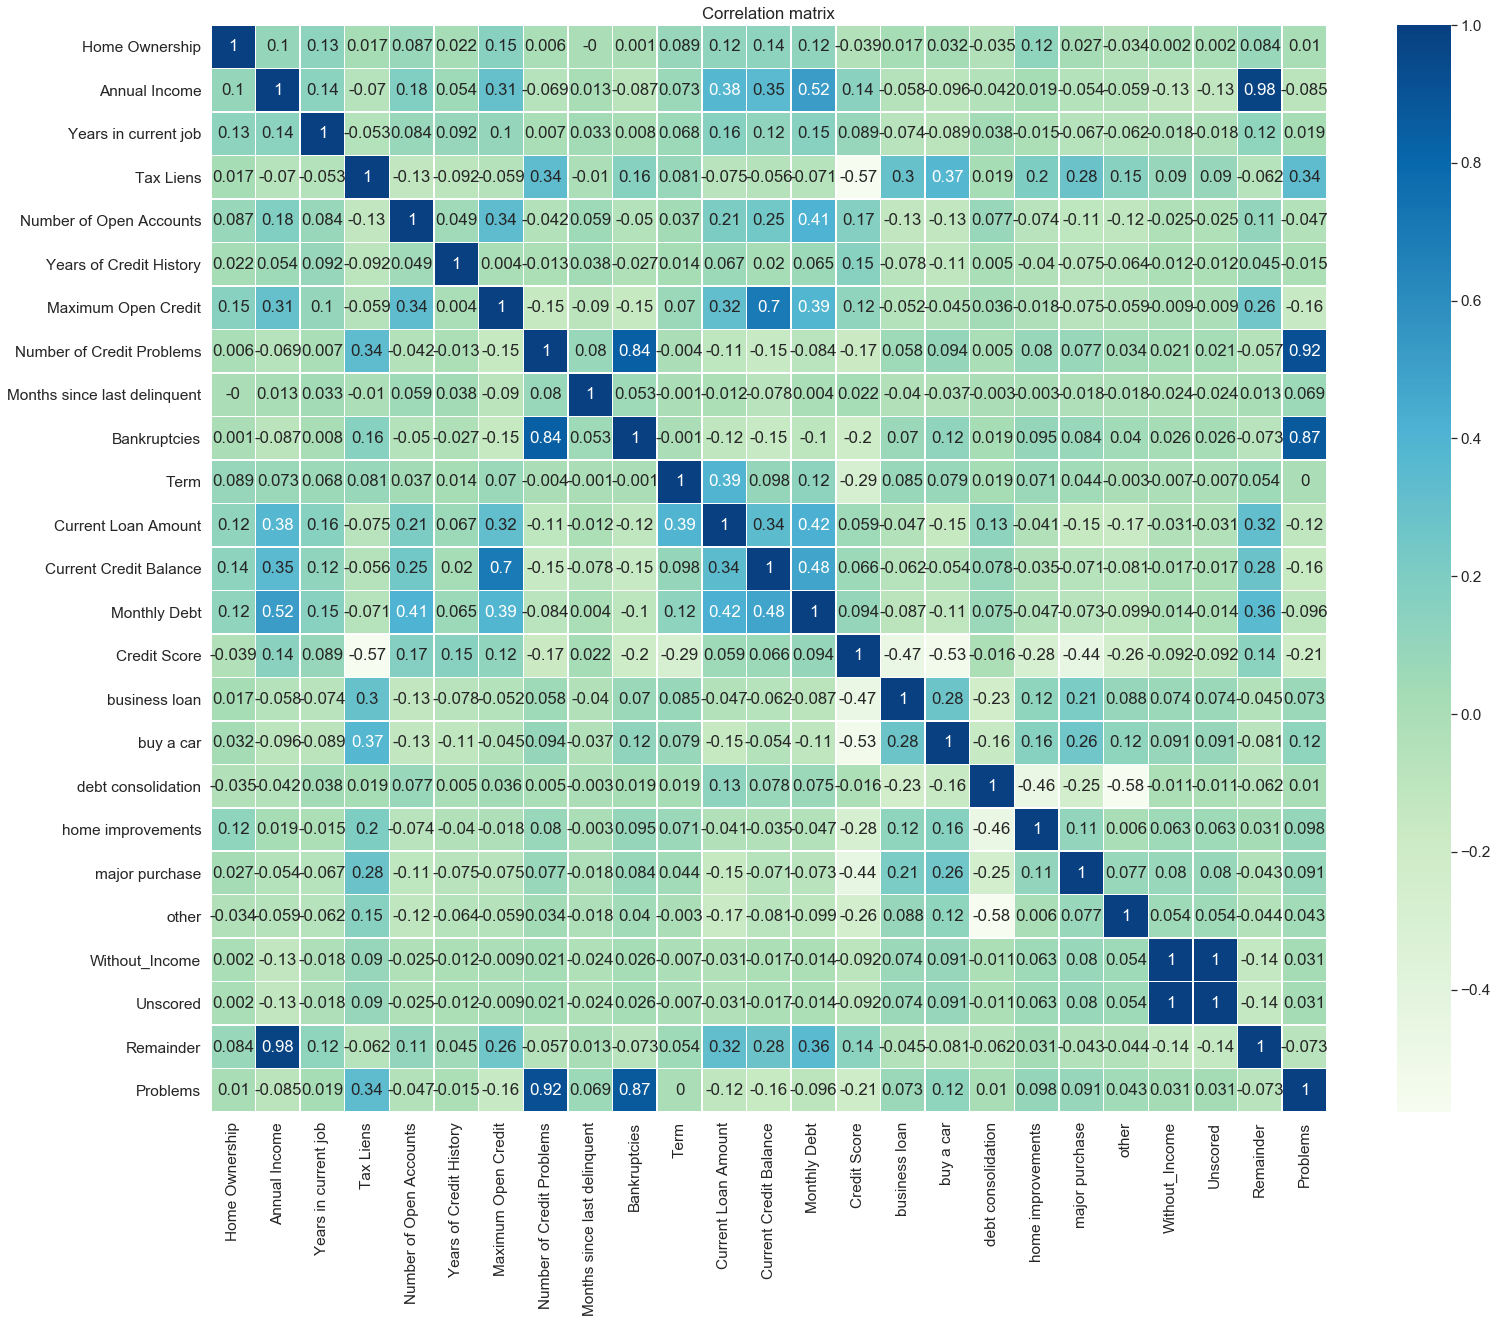

In [69]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [70]:
client = df[['Years in current job', 'Annual Income', 'Home Ownership', 'Years of Credit History']]
client_corrs = client.corr()
client_corrs

,Years in current job,Annual Income,Home Ownership,Years of Credit History
Years in current job,1.00,0.14,0.13,0.09
Annual Income,0.14,1.00,0.10,0.05
Home Ownership,0.13,0.10,1.00,0.02
Years of Credit History,0.09,0.05,0.02,1.00


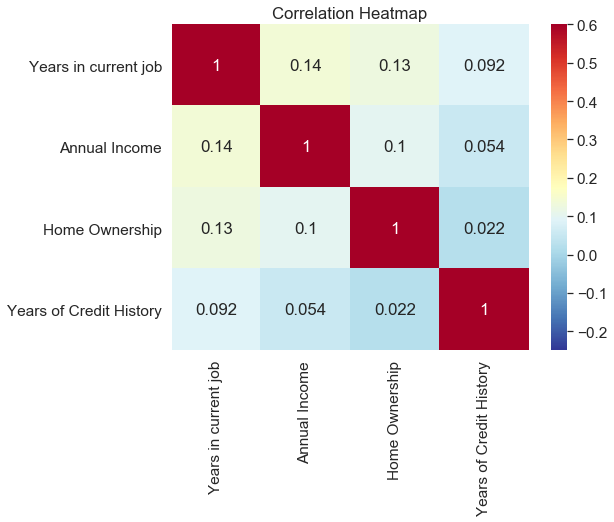

In [71]:
plt.figure(figsize = (8, 6))

sns.heatmap(client_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

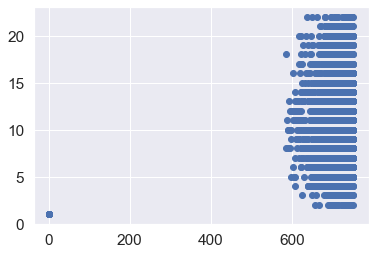

In [72]:
plt.scatter(df['Credit Score'], df['Number of Open Accounts']);

In [73]:
# BASE_FEATURE_NAMES

### <center>Построение модели<a class="anchor" id="course_project"></a><center> 

In [74]:
X = df[BASE_FEATURE_NAMES]
y = df[TARGET_NAME]

#### Нормализация данных

In [106]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[BASE_FEATURE_NAMES] = scaler.fit_transform(df_norm[BASE_FEATURE_NAMES])

df = df_norm.copy()

X = df_norm[BASE_FEATURE_NAMES]
y = df_norm[TARGET_NAME]

#### Разбиение данных на тестовую и валидационную части


In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 42)


#### Балансировка целевой переменной

In [77]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [78]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    4057
1    3136
Name: Credit Default, dtype: int64

In [79]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

### Построение и оценка базовых моделей

In [80]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

#### Линейные модели

*Логистическая регресия*

In [81]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_valid_pred = model_lr.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.65      0.80      0.72      4057
           1       0.63      0.44      0.52      3136

    accuracy                           0.64      7193
   macro avg       0.64      0.62      0.62      7193
weighted avg       0.64      0.64      0.63      7193

TEST

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1303
           1       0.46      0.42      0.44       572

    accuracy                           0.68      1875
   macro avg       0.61      0.60      0.61      1875
weighted avg       0.67      0.68      0.67      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1028  275
1                334  238


*RidgeClassifier*

In [82]:
model_rc = RidgeClassifier(alpha=0.001)
model_rc.fit(X_train, y_train)

y_train_pred = model_rc.predict(X_train)
y_valid_pred = model_rc.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.65      0.80      0.72      4057
           1       0.63      0.43      0.51      3136

    accuracy                           0.64      7193
   macro avg       0.64      0.62      0.62      7193
weighted avg       0.64      0.64      0.63      7193

TEST

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1303
           1       0.46      0.41      0.43       572

    accuracy                           0.68      1875
   macro avg       0.61      0.60      0.60      1875
weighted avg       0.67      0.68      0.67      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1033  270
1                338  234


*LinearSVC*

In [83]:
clf_s = LinearSVC(random_state=0, tol=1e-5, max_iter=1000)
clf_s.fit(X_train, y_train)

y_train_pred = clf_s.predict(X_train)
y_valid_pred = clf_s.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.65      0.80      0.72      4057
           1       0.63      0.44      0.52      3136

    accuracy                           0.64      7193
   macro avg       0.64      0.62      0.62      7193
weighted avg       0.64      0.64      0.63      7193

TEST

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1303
           1       0.47      0.41      0.44       572

    accuracy                           0.68      1875
   macro avg       0.61      0.60      0.61      1875
weighted avg       0.67      0.68      0.67      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1032  271
1                336  236


**k ближайших соседей**

In [84]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_valid_pred = model_knn.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      4057
           1       0.77      0.67      0.71      3136

    accuracy                           0.77      7193
   macro avg       0.77      0.75      0.76      7193
weighted avg       0.77      0.77      0.76      7193

TEST

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1303
           1       0.39      0.41      0.40       572

    accuracy                           0.62      1875
   macro avg       0.56      0.56      0.56      1875
weighted avg       0.63      0.62      0.62      1875

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               930  373
1               338  234


#### Ансамблевые модели

*Случайный лес*

In [85]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_train)
y_pred_valid = clf_rf.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      4057
           1       0.77      0.67      0.71      3136

    accuracy                           0.77      7193
   macro avg       0.77      0.75      0.76      7193
weighted avg       0.77      0.77      0.76      7193

TEST

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1303
           1       0.39      0.41      0.40       572

    accuracy                           0.62      1875
   macro avg       0.56      0.56      0.56      1875
weighted avg       0.63      0.62      0.62      1875

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               930  373
1               338  234


**Бустинговые алгоритмы**

*XGBoost*

In [86]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_valid_pred = model_xgb.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4057
           1       0.99      0.99      0.99      3136

    accuracy                           0.99      7193
   macro avg       0.99      0.99      0.99      7193
weighted avg       0.99      0.99      0.99      7193

TEST

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1303
           1       0.46      0.40      0.43       572

    accuracy                           0.67      1875
   macro avg       0.61      0.60      0.60      1875
weighted avg       0.66      0.67      0.67      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1035  268
1                343  229


*LightGBM*

In [87]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4057
           1       0.91      0.90      0.91      3136

    accuracy                           0.92      7193
   macro avg       0.92      0.92      0.92      7193
weighted avg       0.92      0.92      0.92      7193

TEST

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1303
           1       0.48      0.43      0.45       572

    accuracy                           0.68      1875
   macro avg       0.62      0.61      0.61      1875
weighted avg       0.67      0.68      0.68      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1034  269
1                328  244


*CatBoost*

In [88]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_valid_pred = model_catb.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4057
           1       0.90      0.87      0.88      3136

    accuracy                           0.90      7193
   macro avg       0.90      0.90      0.90      7193
weighted avg       0.90      0.90      0.90      7193

TEST

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1303
           1       0.48      0.46      0.47       572

    accuracy                           0.68      1875
   macro avg       0.62      0.62      0.62      1875
weighted avg       0.68      0.68      0.68      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1018  285
1                310  262


### Выбор лучшей модели и подбор гиперпараметров<a class="anchor" id="tuning_best_model"></a> 

In [89]:
model_catb = CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=11)

**Подбор гиперпараметров**

In [90]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500], 
          'max_depth':[3, 5, 7]}

In [91]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [92]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 1min 10s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001ACF27E8F88>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [93]:
rs.best_params_

{'n_estimators': 500, 'max_depth': 3}

In [94]:
rs.best_score_

0.5198471020868068



#### Обучение и оценка финальной модели

In [95]:
params = {
    'eval_metric': 'F1',
    'auto_class_weights': 'Balanced',
    'silent': True,
    'one_hot_max_size': 20,
    'early_stopping_rounds': 50,
    'boosting_type': 'Ordered',
    'allow_writing_files': False
}

In [96]:
final_model = CatBoostClassifier(
    **params,
    depth=3,
    iterations=100,
    l2_leaf_reg=10,
    learning_rate=0.5
)

final_model.fit(X_train, y_train, eval_set=(X_valid, y_valid))

y_train_pred = final_model.predict(X_train)
y_valid_pred = final_model.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      4057
           1       0.62      0.77      0.69      3136

    accuracy                           0.70      7193
   macro avg       0.70      0.70      0.70      7193
weighted avg       0.71      0.70      0.70      7193

TEST

              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1303
           1       0.43      0.67      0.53       572

    accuracy                           0.63      1875
   macro avg       0.62      0.64      0.61      1875
weighted avg       0.69      0.63      0.64      1875

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               793  510
1               186  386


### <center>Оценка и интерпритация модели<a class="anchor" id="course_project"></a><center> 

#### Оценка важности параметров

In [97]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

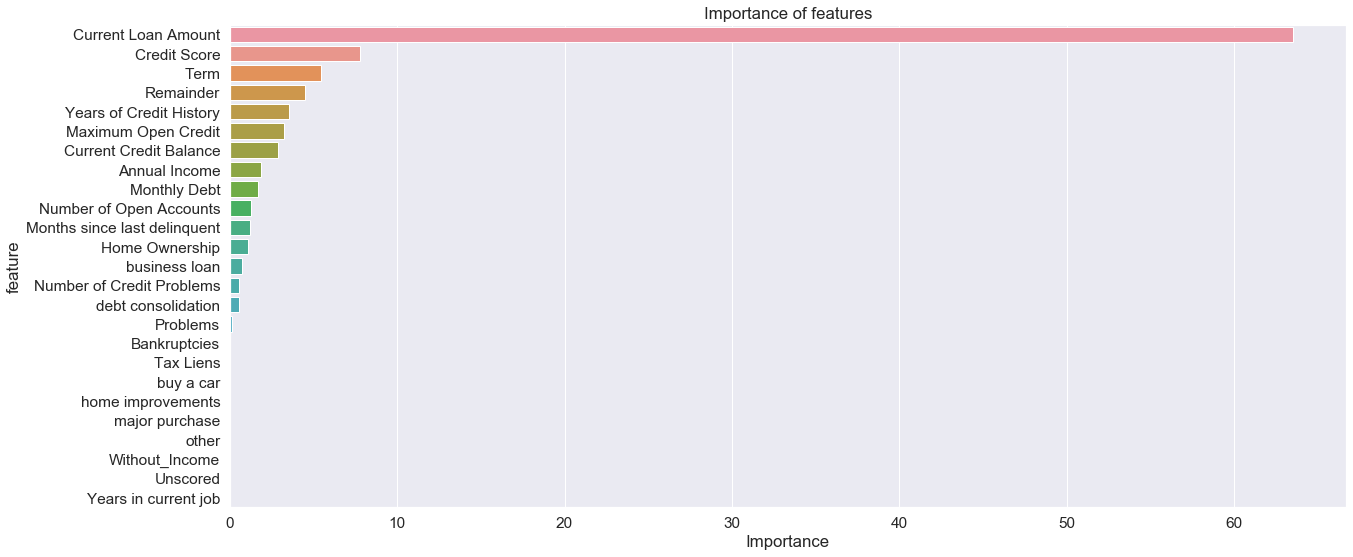

In [98]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=15)

In [99]:
important_features_top

['Current Loan Amount',
 'Credit Score',
 'Term',
 'Remainder',
 'Years of Credit History',
 'Maximum Open Credit',
 'Current Credit Balance',
 'Annual Income',
 'Monthly Debt',
 'Number of Open Accounts',
 'Months since last delinquent',
 'Home Ownership',
 'business loan',
 'Number of Credit Problems',
 'debt consolidation']

### <center>Предсказание на тестовом сете<a class="anchor" id="course_project"></a><center> 

#### Нормализация данных

In [107]:
df_norm_test = df_test.copy()
df_norm_test[BASE_FEATURE_NAMES] = scaler.transform(df_norm_test[BASE_FEATURE_NAMES])

X_test = df_norm_test[BASE_FEATURE_NAMES]

#### Предсказание

In [109]:
y_pred = final_model.predict(X_test)

In [112]:
y_pred.shape

(2500,)

#### Сохранение предсказания

In [113]:
df.to_csv('Lyutova_predictions.csv', index=False, encoding='utf-8')